## HR Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\people.csv")
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


### Data Cleaning / Preparation

In [3]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
df.duplicated().sum() # No of duplicate rows in the dataset

3008

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(11991, 10)

In [9]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [10]:
df.columns   # Get the columns in the dataset

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [13]:
df['timeSpent.company'].value_counts()          

timeSpent.company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [14]:
df['workAccident'].value_counts()

workAccident
0    10141
1     1850
Name: count, dtype: int64

In [15]:
df['avgMonthlyHours'].value_counts() 

avgMonthlyHours
156    112
149    112
160    111
151    107
135    104
      ... 
303      5
297      5
298      5
299      5
302      5
Name: count, Length: 215, dtype: int64

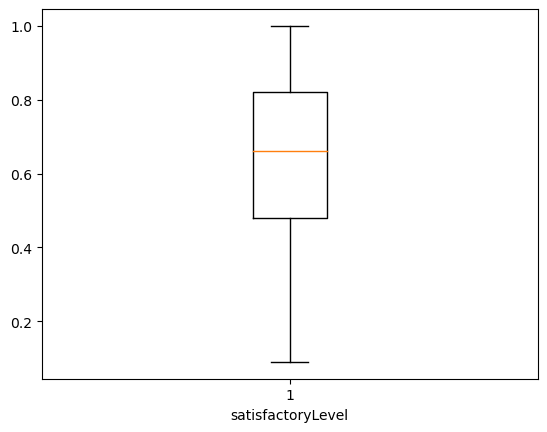

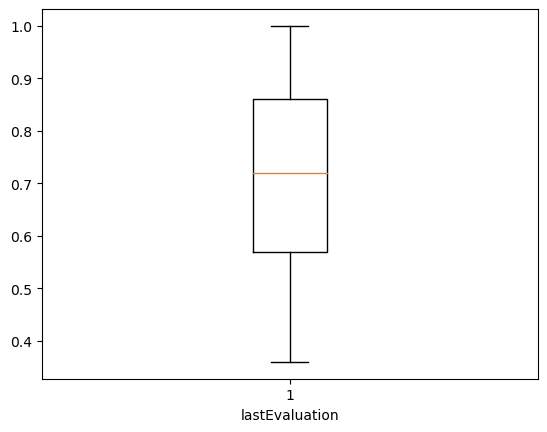

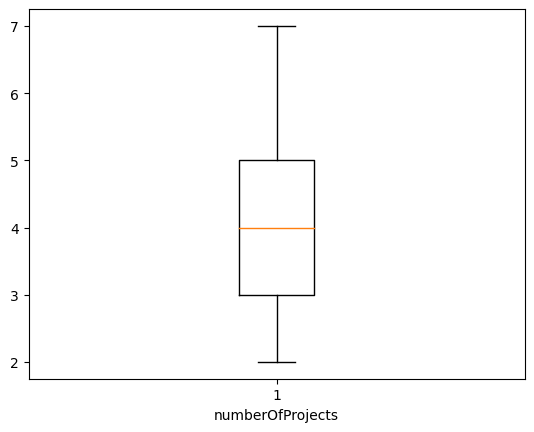

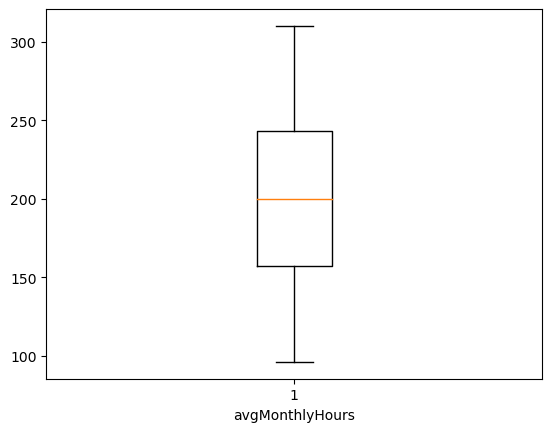

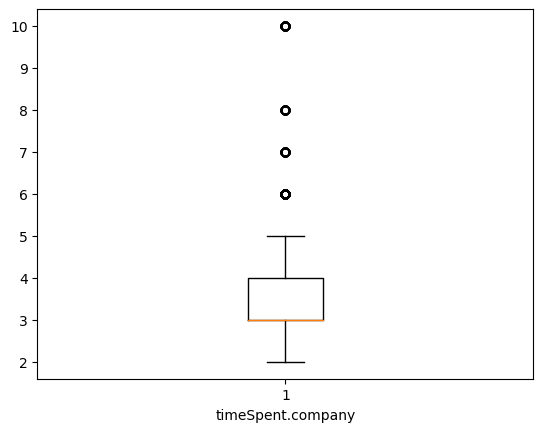

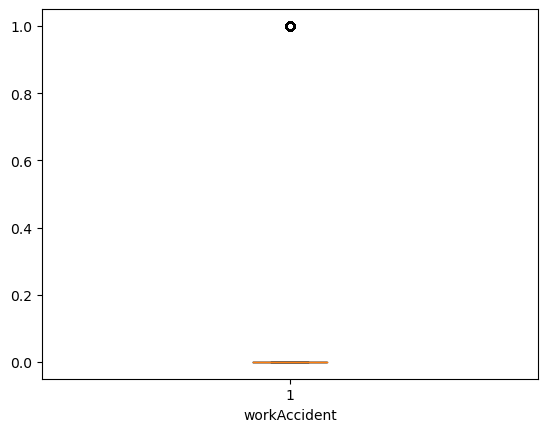

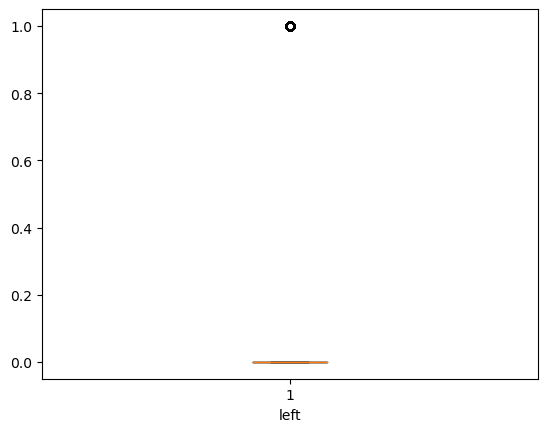

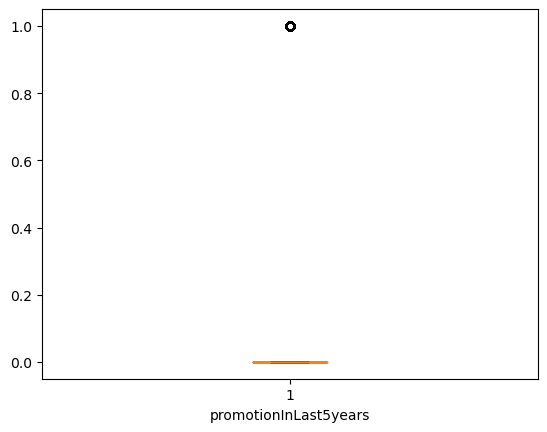

In [16]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

### Extracting insights from the data through EDA

In [17]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

#### Impact of Project Load on Employee Attrition

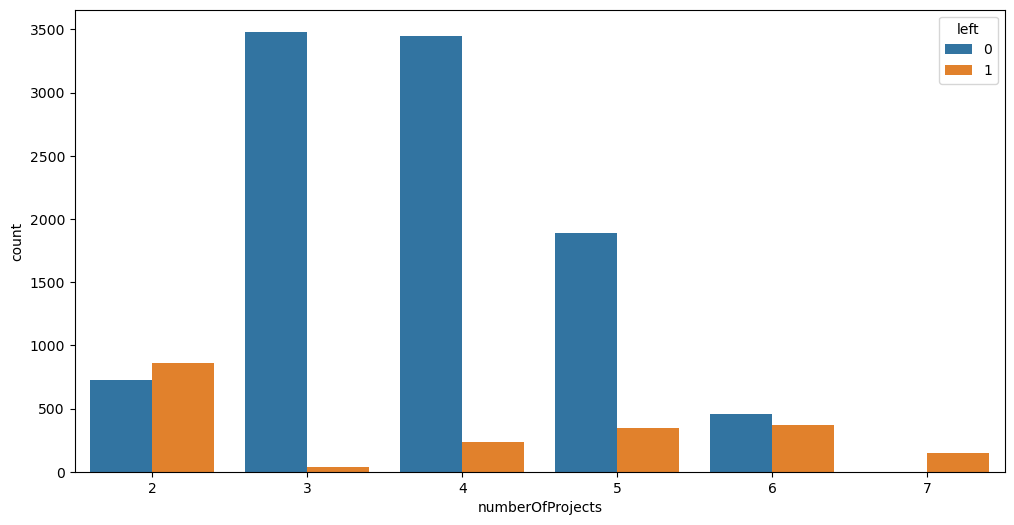

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x = "numberOfProjects",hue = "left",data=df)
plt.show()

#### Inference

- The departure rate is highest among individuals handling either two or seven projects.

#### Recommendation

- The average number of projects assigned to all employees should be 3-5.
- Redistribute the workload among employees handling two projects to balance out the workload from those handling seven projects.



#### Effect of Tenure Insights on Employee Reduction

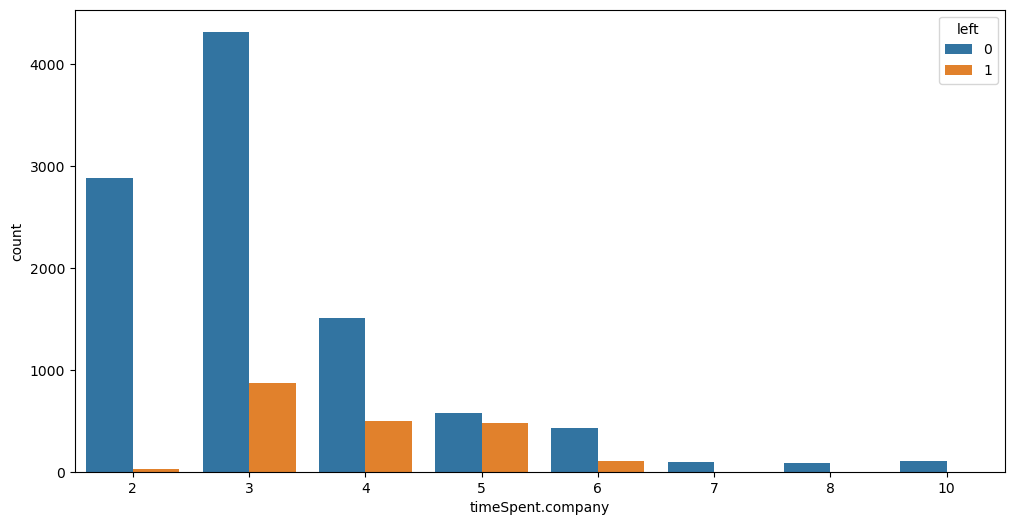

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x = "timeSpent.company",hue = "left",data=df)
plt.show()

#### Inference
- The organization is seeing a increase in the number of employees leaving after 3-5 years.
- Those who have been with the company for more than 6 years tend to stay.

#### Recommendation
- Upon completing 3-5 years, they should be rewarded with such things as hikes, better job positions, incentives, or increments.

#### Impact of the Promotion Process on Employee Departure

In [29]:
df2 = df[df['timeSpent.company']>5] 

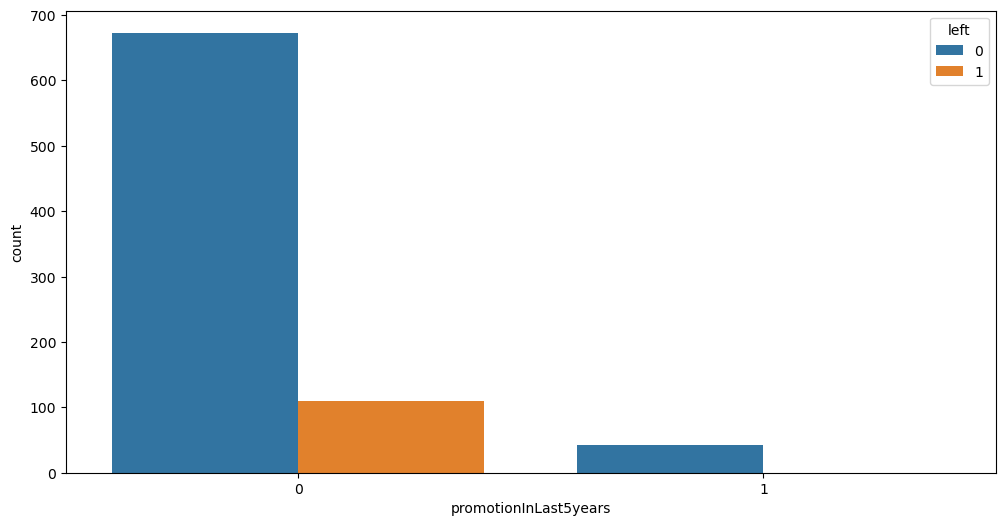

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x = "promotionInLast5years",hue = "left",data=df2)
plt.show()

In [33]:
df[(df['timeSpent.company']>5) & (df['promotionInLast5years']==0)&(df['left']==1)].shape 

(109, 10)

#### Inference
- Employees who have not been promoted in the last 5 years are departing in larger numbers.

#### Recommendation
- Give promotions to all employees in a timely manner.

#### Impact of Work Accidents on Employee Retention

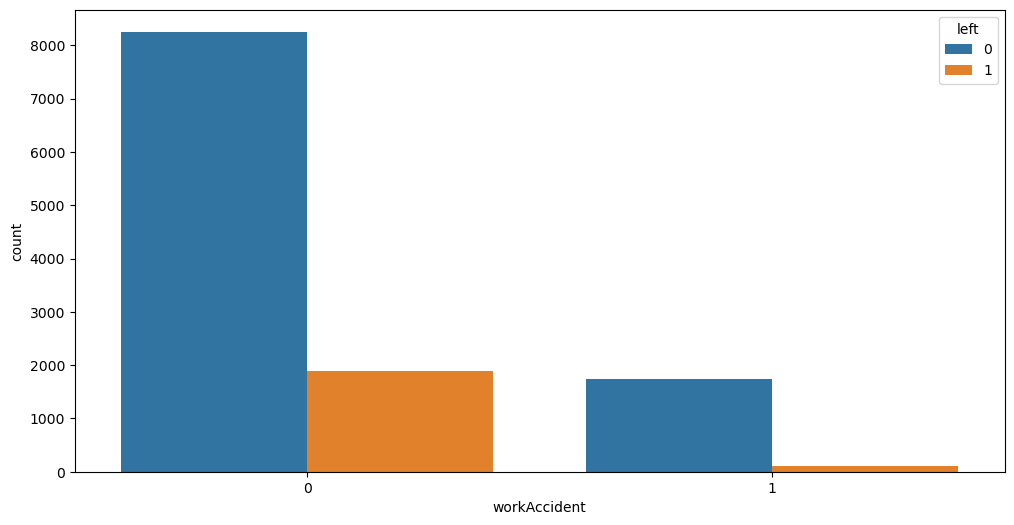

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x = "workAccident",hue = "left",data=df)
plt.show()

#### Inference
- Employees leaving is not significantly influenced by work accidents.

#### Departmental Assessment on Employee Departure

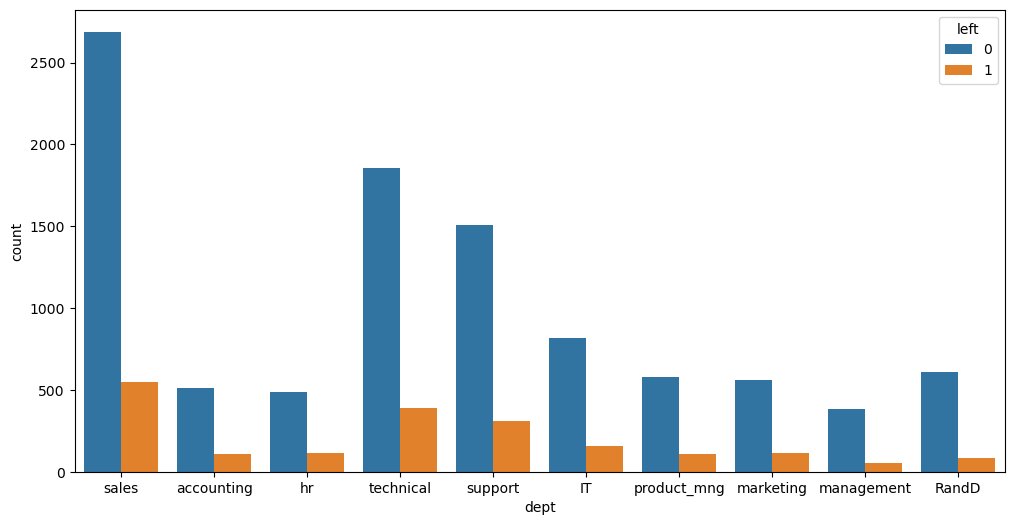

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x = "dept",hue = "left",data=df)
plt.show()

In [41]:
# percentages w.r.t dept
total_count = df.groupby('dept')['left'].count()
total_count  

dept
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: left, dtype: int64

In [43]:
left_count = df.groupby('dept')['left'].sum()
left_count

dept
IT             158
RandD           85
accounting     109
hr             113
management      52
marketing      112
product_mng    110
sales          550
support        312
technical      390
Name: left, dtype: int64

In [44]:
percent_left = (left_count/ total_count) * 100
percent_left

dept
IT             16.188525
RandD          12.247839
accounting     17.552335
hr             18.801997
management     11.926606
marketing      16.641902
product_mng    16.034985
sales          16.980550
support        17.133443
technical      17.379679
Name: left, dtype: float64

#### Inference
- In the highest numbers, employees from HR and accounting are leaving.

#### Recommendation
- Implement measures to reduce the workload of employees, thereby allowing them to achieve a better balance between work and personal life.

#### Impact of Salary on Employee Turnover

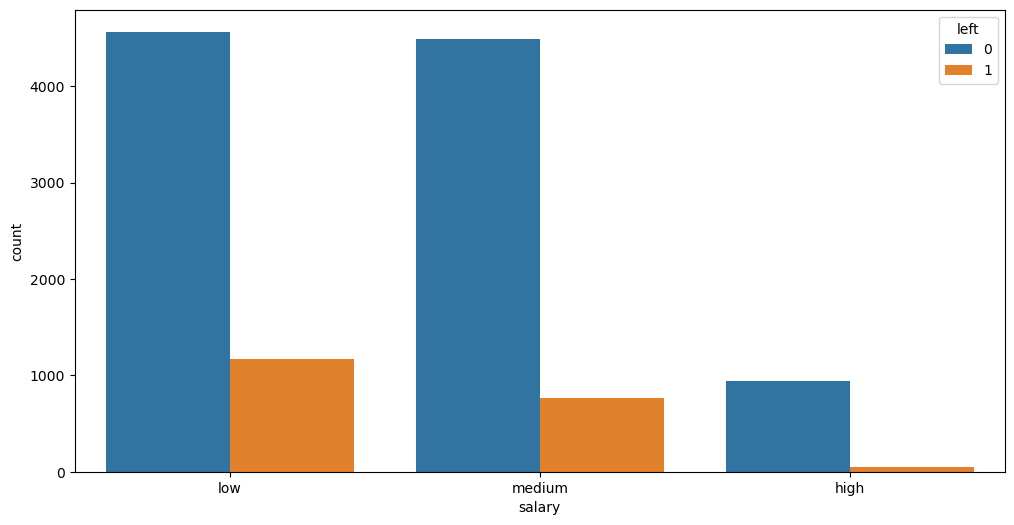

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x = "salary",hue = "left",data=df)
plt.show()

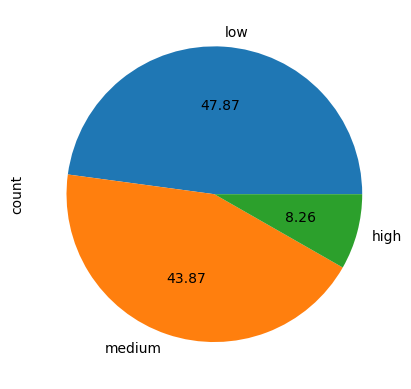

In [49]:
df['salary'].value_counts().plot.pie(autopct='%.2f')
plt.show()

#### Inference
- Employees with lower to moderate salaries are departing in greater numbers, while those with higher salaries exhibit lower departure rates.

#### Recommendation
- Provide employees with a salary that is fair and commensurate with their skills, experience, and contributions to the organization.


#### Effect of Working Hours on Employee Depletion

In [51]:
df.corr(numeric_only=True)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

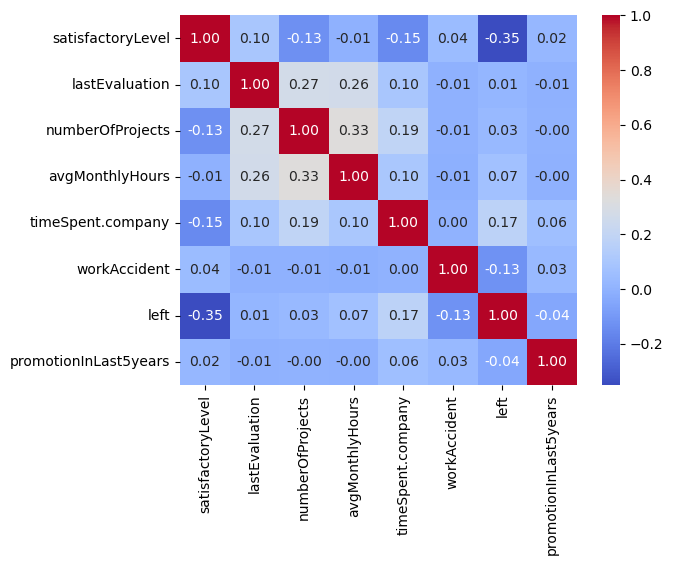

In [55]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm', annot = True, fmt = '.2f')

In [57]:
df['avgMonthlyHours'].mean()

200.4735218080227

<Axes: xlabel='avgMonthlyHours', ylabel='Count'>

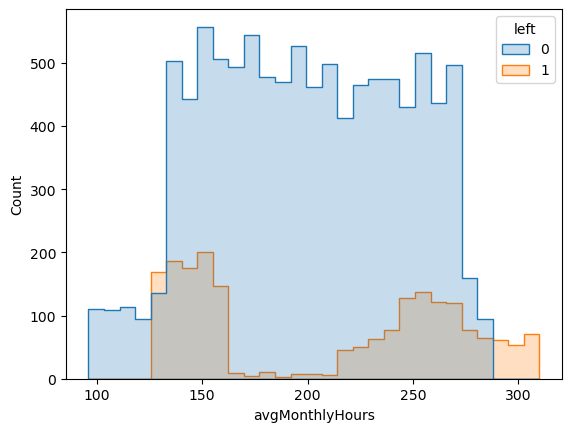

In [61]:
sns.histplot(x='avgMonthlyHours', hue ='left', element = 'step', data=df)

#### Inference
- Employees working over 200 hours are leaving in larger numbers, particularly as they near the 300-hour threshold.

#### Recommendation
- Make sure that employees' working hours are reasonable, and refrain from asking them to work overtime.